<a href="https://colab.research.google.com/github/Shubh8434/Artificial-Intelligence-in-c-/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import tensorflow as tf

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/suicide_hackathon.csv',on_bad_lines='skip')

In [ ]:
data.shape

(1294, 3)

In [ ]:
data.head(11)

,id,category,tweet
0,1,0,"Religion is a mystery. It's a murder, an abduc..."
1,2,0,Dr1ven Industries wooooohoooooo!!! Just broke ...
2,3,0,Our Genomics and Precision Health hot topics o...
3,4,2,Today I just got out of the hospital for an at...
4,5,0,And she also says in the clip that she knew th...
5,6,0,Mandatory measles vaccine in NYC? \n\nWhat's t...
6,7,0,"If Lisa wanted the subject to be suicide, she ..."
7,8,0,"More teenagers take their own lives #suicide, ..."
8,9,1,"So, Apollo, the first thing to do with this ki..."
9,10,0,Kenneth Starr admits he\u00a0omitted in FBI re...


In [ ]:
data.shape

(1294, 3)

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(1294, 3)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56460 sha256=862d13edf4b2e27dd2bfb498a5c9734766a0fc3140528a1c8196e86f61fb1ddb
  Stored in directory: /root/.cache/pip/wheels/55/8b/e7/a23fd46c709c21e3e6fcb55978d88b018f80d54018459978c3
Successfully built np_utils


In [ ]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') 
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

data['tweet'] = data['tweet'].apply(clean_text)

In [ ]:
def example_complain(index):
    example = data[data.index == index][['tweet', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Category:', example[1])

In [ ]:
example_complain(10)

hi im vince foster nremember nni going testify hillary clinton committed suicide park

Category: 2


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3744 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1294, 250)


In [ ]:
Y = pd.get_dummies(data['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1294, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1164, 250) (1164, 3)
(130, 250) (130, 3)


In [ ]:
from keras.optimizers import SGD
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
opt=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 50
batch_size = 16

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/50
63/66 [===========================>..] - ETA: 3s - loss: 0.9364 - accuracy: 0.5685

In [ ]:
model.save('lstm.h5')

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5/5 [==============================] - 1s 151ms/step - loss: 0.6454 - accuracy: 0.7231
Test set
  Loss: 0.645
  Accuracy: 0.723


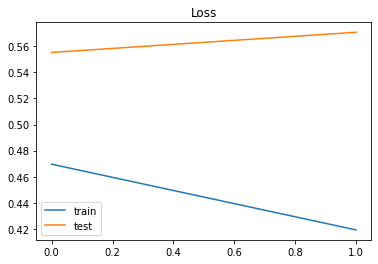

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


In [ ]:
new_complaint = ['i dont want to suicide']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [0,1,2]
print(pred, labels[np.argmax(pred)])

NameError: ignored

In [15]:
model = tf.keras.models.load_model('/content/drive/MyDrive/lstm.h5')

In [1]:
accr = model.evaluate(X_test,Y_test)
print(accr)

NameError: ignored